# Plotting 1D distribution of the charm score

In [1]:
import os, subprocess
import json
import uproot3
import awkward as ak
import numpy as np
from coffea import processor, util, hist
import pickle

#Plot settings
%matplotlib inline
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

import matplotlib.pylab as pylab
params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

#line thickness
import matplotlib as mpl
#mpl.rcParams['lines.linewidth'] = 5

from plotter import *

In [2]:
lumis = {}
lumis['2016'] = 35.9
lumis['2017'] = 41.5
lumis['2018'] = 59.9

with open('xsec.json') as f:
    xs = json.load(f)

with open('pmap.json') as f:
    pmap = json.load(f)

systematics = ['nominal',
               'jet_triggerUp','jet_triggerDown',
               'btagWeightUp','btagWeightDown','btagEffStatUp','btagEffStatDown',
               'UESUp','UESDown','JESUp','JESDown','JERUp','JERDown',
              ]

In [3]:
year = '2017'
n=1 #File index
outsum = processor.dict_accumulator()
picklename = 'pickles/'+str(year)+'_templates.pkl'

In [4]:
#Repickle the file (since we're using a single test output)
with open('../infiles-split/'+year+'_'+str(n)+'.json') as f:
            infiles = json.load(f)

filename = 'outfiles/'+year+'_'+str(n)+'.coffea'

out = util.load(filename)
outsum.add(out)

#Scaling luminosity 
scale_lumi = {k: xs[k] * 1000 *lumis[year] / w for k, w in outsum['sumw'].items()}
outsum['templates'].scale(scale_lumi, 'dataset')


# Use pmap to group the datasets together
templates = outsum['templates'].group('dataset', hist.Cat('process', 'Process'), pmap)

outfile = open(picklename, 'wb')
pickle.dump(templates, outfile, protocol=-1)
outfile.close()

/opt/conda/lib/python3.8/site-packages/coffea/hist/hist_tools.py:376: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7f538c212dc0>
  warnings.warn(


In [4]:
# Read the histogram from the pickle file
templates = pickle.load(open(picklename,'rb'))

In [5]:
templates

<Hist (process,region,systematic,ddb1,msd1,msd2,ddcvb1,ddcvl1) instance at 0x7fe3ac048280>

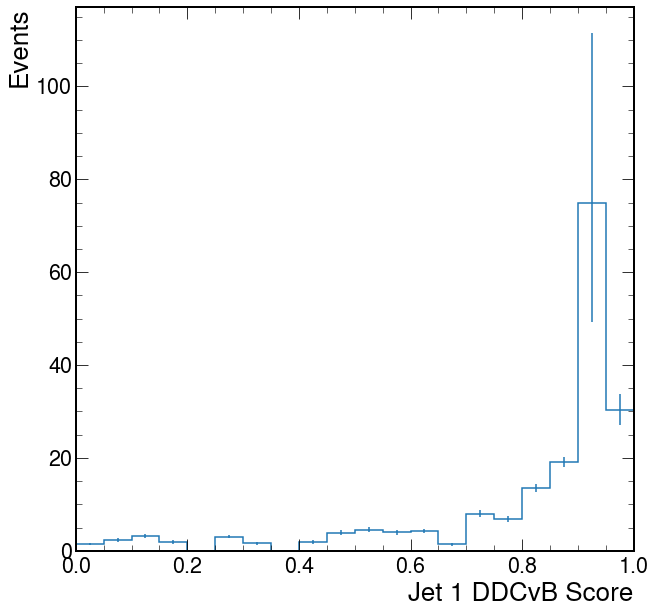

In [8]:
# check intergrals
hist.plot1d(templates.sum('msd1','msd2','ddb1','systematic', 'ddcvl1', 'process','region'))
plt.legend([])